In [1]:
# import base libraries
import numpy as np
import pandas as pd
import sqlalchemy as sa
from sqlalchemy import create_engine

In [2]:
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
#Database credentials

Username = 'admin'
Password = 'amazing_people'
Host = 'alphacode-explore.ccwgqdqrrmvt.eu-west-1.rds.amazonaws.com'
Port = '1433'
Database = 'Sicelo'

In [4]:
#Create the connection
connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database)

In [5]:
#query database

sql_query = "Select * from claims_data_new"

In [6]:
#creating a dataframe

df_claims = pd.read_sql_query(sql_query, connection)

In [7]:
df_claims.head(5)

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.9,3009,0,yes,southwest,yes,16884.924
1,18,male,33.77,3008,1,no,southeast,yes,1725.5523
2,28,male,33,3009,3,no,southeast,no,0
3,33,male,22.705,10009,0,no,northwest,no,0
4,32,male,28.88,8010,0,no,northwest,yes,3866.8552


In [8]:
df_claims['bmi']=df_claims['bmi'].apply(lambda x: pd.to_numeric(x))
df_claims['children']=df_claims['children'].apply(lambda x: pd.to_numeric(x))
df_claims['claim_amount']=df_claims['claim_amount'].apply(lambda x: pd.to_numeric(x))
df_claims = df_claims[df_claims['insurance_claim'] == 'yes']
df_claims.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.90,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.77,3008,1,no,southeast,yes,1725.5523
4,32,male,28.88,8010,0,no,northwest,yes,3866.8552
6,46,female,33.44,3002,1,no,southeast,yes,8240.5896
10,25,male,26.22,8006,0,no,northeast,yes,2721.3208


In [9]:
#drop unnecessary data

df_claims.drop('insurance_claim',axis=1,inplace=True)

In [10]:
y=df_claims['claim_amount']
x=df_claims.drop('claim_amount', axis=1)

In [11]:
x.shape

(783, 7)

In [12]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 1337
Data columns (total 8 columns):
age             783 non-null int64
sex             783 non-null object
bmi             783 non-null float64
steps           783 non-null int64
children        783 non-null int64
smoker          783 non-null object
region          783 non-null object
claim_amount    783 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.1+ KB


In [13]:
x_1 = pd.get_dummies(x,columns=['smoker','sex', 'region'], drop_first=True)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=101)

In [16]:
#Training the model
#import models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [18]:
lg=LinearRegression()
lg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
logtree=DecisionTreeRegressor(random_state=50)
logtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=50, splitter='best')

In [20]:
logran=RandomForestRegressor()
logran.fit(X_train,y_train)


C:\Users\Sicelo Mpofana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [21]:
logscaler=StandardScaler()
x_scaled = logscaler.fit_transform(x_1)
x_standard = pd.DataFrame(x_scaled,columns=x_1.columns)

In [22]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [23]:
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=100)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
coeff_df = pd.DataFrame(lg.coef_,x_1.columns,columns=['Coefficient'])
ridge_coef = pd.DataFrame(ridge.coef_,index=x_1.columns,columns=['Ridge'])
lasso_coef = pd.DataFrame(lasso.coef_,index=x_1.columns,columns=['Lasso'])
                          
pd.concat([coeff_df, ridge_coef, lasso_coef], axis=1)

,Coefficient,Ridge,Lasso
age,256.937265,252.276575,257.774886
bmi,729.883865,637.338550,687.493702
steps,0.632326,0.356801,0.567255
children,703.198077,994.217762,670.680739
smoker_yes,26783.454050,24313.616540,26178.933749
sex_male,-270.013895,-74.196488,-0.000000
region_northwest,-569.767051,-461.722197,0.000000
region_southeast,-1449.911013,-929.436586,-359.329517
region_southwest,-902.409507,-665.720173,-0.000000


In [25]:
pred_lg=lg.predict(X_test)
pred_knn = knn.predict(X_test)
pred_tree = logtree.predict(X_test)
pred_forest=logran.predict(X_test)
#pred_svm = svm.predict(X_test)



# testing

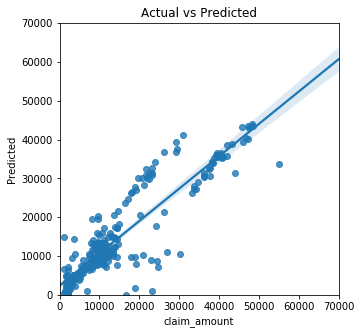

In [26]:
# Linear
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sn.regplot(x=y_test, y=pred_lg)

In [27]:
print('RMSE:', metrics.mean_squared_error(y_test, pred_lg) ** 0.5)

RMSE: 5857.143300744319


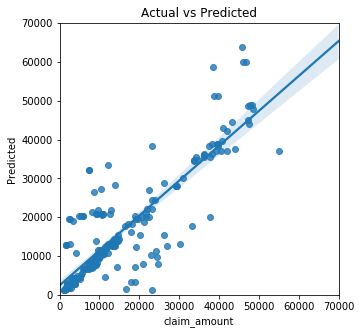

In [28]:
#Decision Tree
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sn.regplot(x=y_test, y=pred_tree)

In [29]:
print('RMSE:', mean_squared_error(y_test, pred_tree) ** 0.5)

RMSE: 7043.071621561831


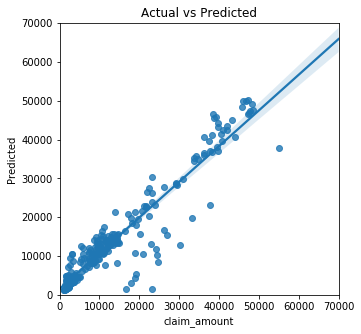

In [30]:
# Random Forest Test
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sn.regplot(x=y_test, y=pred_forest)

In [31]:
print('RMSE:', mean_squared_error(y_test, pred_forest) ** 0.5)

RMSE: 4596.2552165113075


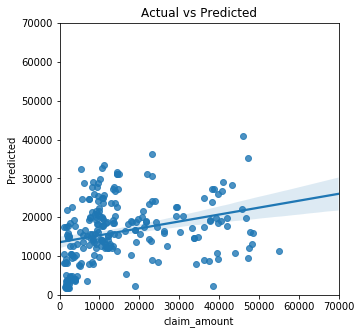

In [32]:
# Random Forest Test
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)

sn.regplot(x=y_test, y=pred_knn)

In [33]:
print('RMSE:', mean_squared_error(y_test, pred_knn) ** 0.5)

RMSE: 13175.201965651524


In [34]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [35]:
#Create the connection
connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database)

In [36]:
#Tes dataquery database

sql_query_test = "Select * from med_test"

In [37]:
#creating a dataframe

claims_amount = pd.read_sql_query(sql_query_test, connection)

In [38]:
claims_amount.head()

,row_id,age,sex,bmi,steps,children,smoker,region
0,1,27,male,28.88,8049,0,False,southwest
1,2,20,female,26.265,7970,3,True,southwest
2,3,32,female,26.025,2973,0,False,southwest
3,4,19,female,22.085,10427,1,True,southwest
4,5,20,female,28.685,3972,0,True,southwest


In [39]:
x=claims_amount.drop('row_id', axis=1)
x_1 = pd.get_dummies(x, columns=['smoker','sex', 'region'], drop_first=True)
x_1.head()

,age,bmi,steps,children,smoker_True,sex_male,region_northwest,region_southeast,region_southwest
0,27,28.88,8049,0,0,1,0,0,1
1,20,26.265,7970,3,1,0,0,0,1
2,32,26.025,2973,0,0,0,0,0,1
3,19,22.085,10427,1,1,0,0,0,1
4,20,28.685,3972,0,1,0,0,0,1


In [40]:
actual_claim=logtree.predict(x_1)

In [41]:
results=pd.DataFrame({'row_id' : claims_amount.row_id,'predictions' : actual_claim.ravel()})
results.head()

,row_id,predictions
0,1,3385.39915
1,2,16232.84700
2,3,3554.20300
3,4,15518.18025
4,5,17081.08000


In [42]:
results.to_sql('claim_amount_model_results', con=connection, if_exists='append', index=False,method='multi',chunksize=500)